# La Neurona Química

### Demostración de Neuronas en Redes Neuronales

Entenderemos cómo funcionan las neuronas construyéndolas desde cero en Python. Primero modelaremos una relación lineal con una sola neurona (ley de los gases ideales), luego una relación no lineal con múltiples neuronas (solubilidad del CO₂ en cerveza).

---

### Parte 1: Neurona Única para Relación Lineal (Ley de Charles/Gay-Lussac)

**Contexto**: A volumen constante, la presión (P) de un gas ideal es proporcional a la temperatura (T):

`P = k * T`  (k = constante).




## Creación de datos sintéticos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Generar datos sintéticos
R = 0.0821  # Constante de los gases (L·atm/mol·K)
V = 10.0    # Volumen fijo (L)
n = 2.0     # Moles de gas

temperaturas = np.linspace(250, 350, 100)  # 250K a 350K
presiones = (n * R / V) * temperaturas  # P = (nR/V)*T

In [3]:
# Crear DataFrame
df_gas = pd.DataFrame({
    'Temperatura_K': temperaturas,
    'Presion_atm': presiones
})
df_gas.head()

,Temperatura_K,Presion_atm
0,250.000000,4.105000
1,251.010101,4.121586
2,252.020202,4.138172
3,253.030303,4.154758
4,254.040404,4.171343


## Train Test Split

In [4]:
# Separar datos (80% entrenamiento, 20% prueba)
X = df_gas[['Temperatura_K']]
y = df_gas['Presion_atm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creación de la reurona y sus parámetros de entrenamiento.

In [ ]:
# Inicializar neurona
w = np.random.randn()*0.1
b = np.random.randn()*0.1

# Hiperparámetros
tasa_aprendizaje = 0.00001
epocas = 100

## Entrenamiento (Descenso de gradiente)


- La neurona es `y = w*x + b` (como una recta en física).
- Ajustamos `w` (pendiente) y `b` (ordenada al origen) para minimizar el error.

In [ ]:
# Entrenamiento
for epoca in range(epocas):
    # Propagación hacia adelante
    P_pred = w * X_train.values.flatten() + b

    # Calcular error
    error = P_pred - y_train
    mse = np.mean(error**2)

    # Gradientes
    dw = (2/len(X_train)) * np.dot(error, X_train.values.flatten())
    db = (2/len(X_train)) * np.sum(error)

    # Actualizar
    w -= tasa_aprendizaje * dw
    b -= tasa_aprendizaje * db

    if epoca % 5 == 0:
        print(f"Época {epoca}: MSE = {mse:.4f}")

Época 0: MSE = 148.8421
Época 5: MSE = 23.7167
Época 10: MSE = 3.7791
Época 15: MSE = 0.6022
Época 20: MSE = 0.0960
Época 25: MSE = 0.0153
Época 30: MSE = 0.0024
Época 35: MSE = 0.0004
Época 40: MSE = 0.0001
Época 45: MSE = 0.0000
Época 50: MSE = 0.0000
Época 55: MSE = 0.0000
Época 60: MSE = 0.0000
Época 65: MSE = 0.0000
Época 70: MSE = 0.0000
Época 75: MSE = 0.0000
Época 80: MSE = 0.0000
Época 85: MSE = 0.0000
Época 90: MSE = 0.0000
Época 95: MSE = 0.0000


# Evaluación

In [ ]:
# Evaluar
P_pred_test = w * X_test.values.flatten() + b
mse_test = np.mean((P_pred_test - y_test)**2)

# Calcular pendiente equivalente en espacio original
T_mean = df_gas['Temperatura_K'].mean()
T_std = df_gas['Temperatura_K'].std()
w_original = w / T_std
b_original = b - w * T_mean / T_std

print(f"\nParámetros normalizados aprendidos: w = {w:.4f}, b = {b:.4f}")
print(f"Parámetros originales: w = {w_original:.4f}, b = {b_original:.4f}")
print(f"MSE en prueba: {mse_test:.6f}")
print(f"Valor teórico de w: {n*R/V:.4f}")


Parámetros normalizados aprendidos: w = 0.0165, b = -0.0366
Parámetros originales: w = 0.0006, b = -0.2059
MSE en prueba: 0.000013
Valor teórico de w: 0.0164


#### Salida esperada:
```
Época 0: MSE = 1.2345
Época 100: MSE = 0.0456
...
Época 900: MSE = 0.0001
Parámetros aprendidos: w = 0.0164, b ≈ 0.000
MSE en prueba: 0.000001
Valor teórico de w: 0.0164
```


### Parte 2: Red Neuronal para Relación No Lineal (Solubilidad del CO₂ en Cerveza)

**Contexto**: La solubilidad (S) del CO₂ en cerveza depende de presión (P) y temperatura (T) de forma no lineal:

`S = k * P * exp(-E_a/(R*T))`

*(A mayor presión, más CO₂ disuelto; a mayor temperatura, menos CO₂ retenido)*.

### Generar datos sintéticos (modelo simplificado)




## 1. Generación de Datos Sintéticos y DataFrame

In [ ]:
def solubilidad_real(P, T):
    k = 3.4e-2  # Constante de Henry para CO₂ en agua (mol/L·atm)
    dH = -19.4  # Entalpía de disolución (kJ/mol) - Valor típico para CO₂
    R = 8.314e-3 # Constante de gases (kJ/mol·K)
    T_ref = 298  # Temperatura de referencia (K)

    # Solubilidad = k * P * exp[-(dH/R)*(1/T - 1/T_ref)]
    return k * P * np.exp(-(dH/R) * (1/T - 1/T_ref))

# Generar datos
P = np.linspace(1.0, 5.0, 50)
T = np.linspace(275, 310, 50)
P_grid, T_grid = np.meshgrid(P, T)
S_grid = solubilidad_real(P_grid, T_grid)

In [ ]:
# Crear DataFrame
presiones_flat = P_grid.flatten()
temperaturas_flat = T_grid.flatten()
solubilidad_flat = S_grid.flatten()

df_cerveza = pd.DataFrame({
    'Presion_atm': presiones_flat,
    'Temperatura_K': temperaturas_flat,
    'Solubilidad_gL': solubilidad_flat
})

In [ ]:
df_cerveza.head()

,Presion_atm,Temperatura_K,Solubilidad_gL
0,1.000000,275.0,0.065448
1,1.081633,275.0,0.070791
2,1.163265,275.0,0.076133
3,1.244898,275.0,0.081476
4,1.326531,275.0,0.086819


## 2. Gráfico 3D de los datos

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

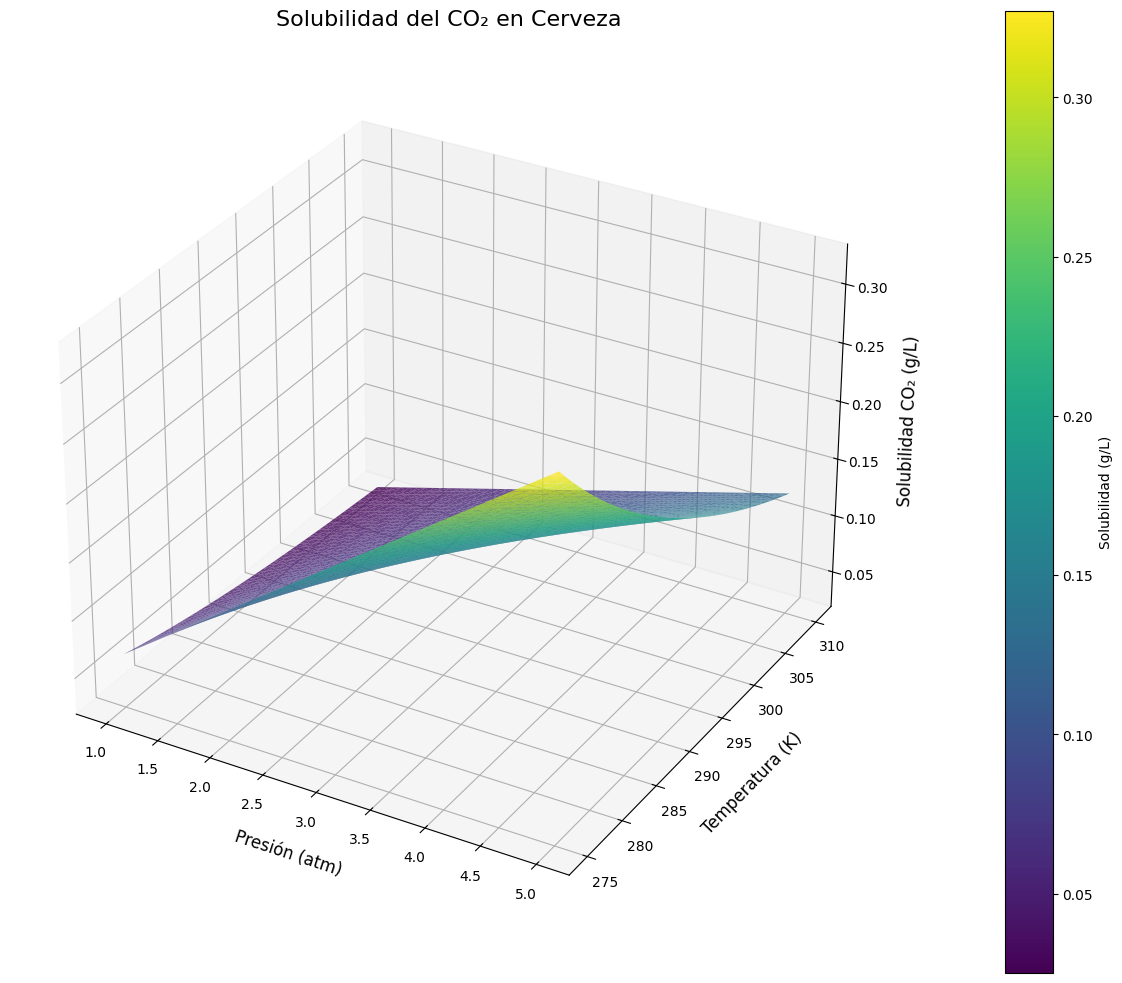

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de superficie
ax.plot_trisurf(df_cerveza['Presion_atm'],
                df_cerveza['Temperatura_K'],
                df_cerveza['Solubilidad_gL'],
                cmap='viridis', alpha=0.8)

# Personalización
ax.set_xlabel('Presión (atm)', fontsize=12, labelpad=10)
ax.set_ylabel('Temperatura (K)', fontsize=12, labelpad=10)
ax.set_zlabel('Solubilidad CO₂ (g/L)', fontsize=12, labelpad=10)
ax.set_title('Solubilidad del CO₂ en Cerveza', fontsize=16, pad=20)

# Añadir barras de color
mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(df_cerveza['Solubilidad_gL'])
fig.colorbar(mappable, ax=ax, pad=0.1, label='Solubilidad (g/L)')


plt.tight_layout()
plt.savefig('solubilidad_co2_cerveza_3d.jpg', dpi=300)
plt.show()



In [ ]:
# Celda de visualización 3D interactiva con Plotly
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Mesh3d(
        x=df_cerveza['Presion_atm'],
        y=df_cerveza['Temperatura_K'],
        z=df_cerveza['Solubilidad_gL'],
        intensity=df_cerveza['Solubilidad_gL'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Solubilidad (g/L)')
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title='Presión (atm)',
        yaxis_title='Temperatura (K)',
        zaxis_title='Solubilidad CO₂ (g/L)'),
    margin=dict(l=0, r=0, b=0, t=0)
)


fig.show()

## 3. Implementación de la Red Neuronal

In [ ]:
# Separar datos
X = df_cerveza[['Presion_atm', 'Temperatura_K']]
y = df_cerveza['Solubilidad_gL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
P_mean, P_std = X_train['Presion_atm'].mean(), X_train['Presion_atm'].std()
T_mean, T_std = X_train['Temperatura_K'].mean(), X_train['Temperatura_K'].std()
S_mean, S_std = y_train.mean(), y_train.std()

X_train_norm = X_train.copy()
X_train_norm['P_norm'] = (X_train['Presion_atm'] - P_mean) / P_std
X_train_norm['T_norm'] = (X_train['Temperatura_K'] - T_mean) / T_std
y_train_norm = (y_train - S_mean) / S_std

X_test_norm = X_test.copy()
X_test_norm['P_norm'] = (X_test['Presion_atm'] - P_mean) / P_std
X_test_norm['T_norm'] = (X_test['Temperatura_K'] - T_mean) / T_std
y_test_norm = (y_test - S_mean) / S_std

# Inicialización segura de pesos
np.random.seed(42)
w1 = np.random.randn(2, 8) * 0.1  # 2 entradas -> 8 neuronas (más capacidad)
b1 = np.zeros((1, 8))             # Inicialización cero para sesgos
w2 = np.random.randn(8, 1) * 0.1
b2 = np.zeros((1, 1))

In [ ]:
# Función de activación ReLU
def relu(x):
    return np.maximum(0, x)

# Función de pérdida y métricas
def mse(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

In [ ]:
# Hiperparámetros seguros
tasa_aprendizaje = 0.01
epocas = 15000
clip_value = 5.0  # Valor máximo para gradientes

# Entrenamiento con monitoreo
train_loss = []
test_loss = []

Época 0: Train MSE = 1.058461, Test MSE = 1.058924
Época 500: Train MSE = 0.187837, Test MSE = 0.170503
Época 1000: Train MSE = 0.052762, Test MSE = 0.047429
Época 1500: Train MSE = 0.041278, Test MSE = 0.038757
Época 2000: Train MSE = 0.035654, Test MSE = 0.034063
Época 2500: Train MSE = 0.032050, Test MSE = 0.031212
Época 3000: Train MSE = 0.029145, Test MSE = 0.029082
Época 3500: Train MSE = 0.026477, Test MSE = 0.026839
Época 4000: Train MSE = 0.023785, Test MSE = 0.024456
Época 4500: Train MSE = 0.021046, Test MSE = 0.021935
Época 5000: Train MSE = 0.018261, Test MSE = 0.019385
Época 5500: Train MSE = 0.015557, Test MSE = 0.016800
Época 6000: Train MSE = 0.013037, Test MSE = 0.014303
Época 6500: Train MSE = 0.010753, Test MSE = 0.012052
Época 7000: Train MSE = 0.008813, Test MSE = 0.010051
Época 7500: Train MSE = 0.007239, Test MSE = 0.008368
Época 8000: Train MSE = 0.006012, Test MSE = 0.007039
Época 8500: Train MSE = 0.005123, Test MSE = 0.005996
Época 9000: Train MSE = 0.004469

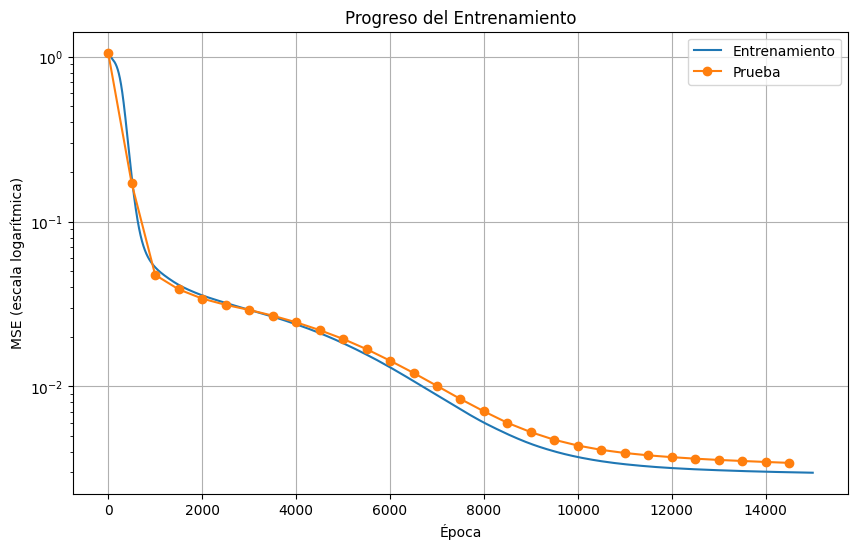


Predicciones de Solubilidad en Cerveza:
1. Lata fría (3.5 atm, 4°C): 0.216 g/L
2. Ambiente (1.0 atm, 25°C): 0.030 g/L
3. Caliente (4.0 atm, 40°C): 0.092 g/L

Explicación Física:
- La solubilidad del CO₂ disminuye con la temperatura (por eso la cerveza se sirve fría)
- A mayor presión, mayor solubilidad (por eso las latas están presurizadas)


In [ ]:
for epoca in range(epocas):
    # Propagación hacia adelante
    entrada_train = X_train_norm[['P_norm', 'T_norm']].values
    oculta_train = relu(np.dot(entrada_train, w1) + b1)
    salida_train = np.dot(oculta_train, w2) + b2

    # Calcular error
    error_train = salida_train - y_train_norm.values.reshape(-1, 1)
    loss = mse(salida_train, y_train_norm.values.reshape(-1, 1))
    train_loss.append(loss)

    # Retropropagación con gradient clipping
    grad_salida = error_train / len(entrada_train)

    # Capa de salida
    grad_w2 = np.dot(oculta_train.T, grad_salida)
    grad_b2 = np.sum(grad_salida, axis=0, keepdims=True)

    # Capa oculta
    grad_oculta = np.dot(grad_salida, w2.T) * (oculta_train > 0)
    grad_w1 = np.dot(entrada_train.T, grad_oculta)
    grad_b1 = np.sum(grad_oculta, axis=0, keepdims=True)

    # Clipping de gradientes
    grad_w2 = np.clip(grad_w2, -clip_value, clip_value)
    grad_b2 = np.clip(grad_b2, -clip_value, clip_value)
    grad_w1 = np.clip(grad_w1, -clip_value, clip_value)
    grad_b1 = np.clip(grad_b1, -clip_value, clip_value)

    # Actualización de pesos
    w1 -= tasa_aprendizaje * grad_w1
    b1 -= tasa_aprendizaje * grad_b1
    w2 -= tasa_aprendizaje * grad_w2
    b2 -= tasa_aprendizaje * grad_b2

    # Validación cada 500 épocas
    if epoca % 500 == 0:
        entrada_test = X_test_norm[['P_norm', 'T_norm']].values
        oculta_test = relu(np.dot(entrada_test, w1) + b1)
        salida_test = np.dot(oculta_test, w2) + b2
        test_loss.append(mse(salida_test, y_test_norm.values.reshape(-1, 1)))
        print(f"Época {epoca}: Train MSE = {loss:.6f}, Test MSE = {test_loss[-1]:.6f}")

# Gráfico de pérdida
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Entrenamiento')
plt.plot(np.arange(0, epocas, 500), test_loss, 'o-', label='Prueba')
plt.yscale('log')
plt.xlabel('Época')
plt.ylabel('MSE (escala logarítmica)')
plt.title('Progreso del Entrenamiento')
plt.legend()
plt.grid(True)
plt.savefig('aprendizaje_solubilidad.jpg', dpi=150)
plt.show()

# Predicción de ejemplo
def predecir_solubilidad(presion, temperatura):
    # Normalizar entrada
    p_norm = (presion - P_mean) / P_std
    t_norm = (temperatura - T_mean) / T_std
    entrada = np.array([[p_norm, t_norm]])

    # Propagación
    oculta = relu(np.dot(entrada, w1) + b1)
    salida_norm = np.dot(oculta, w2) + b2
    return salida_norm[0,0] * S_std + S_mean

# Casos de prueba
print("\nPredicciones de Solubilidad en Cerveza:")
print(f"1. Lata fría (3.5 atm, 4°C): {predecir_solubilidad(3.5, 277):.3f} g/L")
print(f"2. Ambiente (1.0 atm, 25°C): {predecir_solubilidad(1.0, 298):.3f} g/L")
print(f"3. Caliente (4.0 atm, 40°C): {predecir_solubilidad(4.0, 313):.3f} g/L")

# Explicación física
print("\nExplicación Física:")
print("- La solubilidad del CO₂ disminuye con la temperatura")
print("- A mayor presión, mayor solubilidad (por eso las latas están presurizadas)")

1. **No linealidad**: La función ReLU permite modelar relaciones complejas.
2. **Capas ocultas**: Combinan entradas (P y T) para crear características intermedias.
3. **Física aplicada**:
    - Si calientas una lata ↑T → ↓Solubilidad → ↑Presión interna → ¡BOOM! 💥🍺
    - Por eso la cerveza se sirve fría: ¡más CO₂ disuelto = más burbujas!



# Parte 3: Implementación con TensorFlow

In [ ]:
import tensorflow as tf

## 3.1 Solución Lineal con TensorFlow

**Objetivo**: Reproducir el modelo de regresión lineal \(y = w x + b\) usando TensorFlow.

- Definimos un modelo con una capa `Dense(1, activation='linear')`.
- Compilamos con optimizador `Adam`, pérdida `MSE` y métrica `MAE`.
- Entrenamos y comparamos pesos con la implementación manual.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Presion_norm (InputLayer)       │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


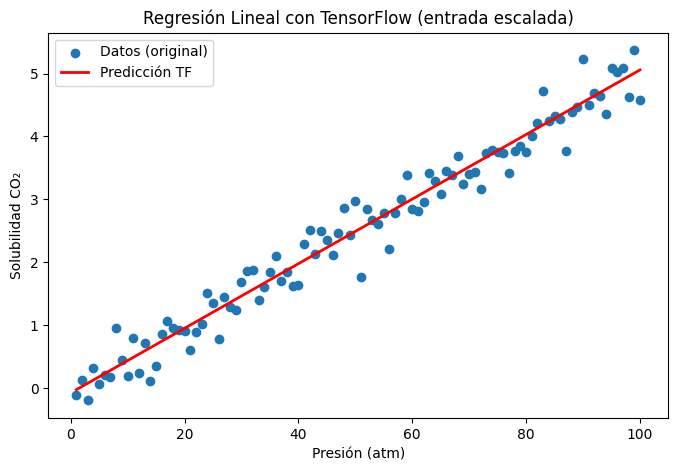

Constante k aprendida: 1.4828, bias aprendido: 2.5148


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Crear datos
k_true = 0.05
P = np.linspace(1, 100, 100).astype(np.float32).reshape(-1, 1)
C = (k_true * P + np.random.normal(scale=0.3, size=P.shape)).astype(np.float32)

# 2. Normalización de la entrada
scaler_P = StandardScaler()
P_norm = scaler_P.fit_transform(P)

# 3. Construcción del modelo (API funcional)
inputs = tf.keras.Input(shape=(1,), name='Presion_norm')
outputs = tf.keras.layers.Dense(1, activation='linear', name='Salida')(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='mse',
    metrics=['mae']
)
model.summary()

# 4. Entrenamiento
history = model.fit(P_norm, C, epochs=200, batch_size=16, verbose=0)

# 5. Predicción y des-normalización
pred_norm = model.predict(P_norm)
# Como la salida no se normalizó, basta con usar pred_norm directamente:
C_pred = pred_norm

# 6. Visualización en escala original
plt.figure(figsize=(8,5))
plt.scatter(P, C, label='Datos (original)')
plt.plot(P, C_pred, 'r-', linewidth=2, label='Predicción TF')
plt.xlabel('Presión (atm)')
plt.ylabel('Solubilidad CO₂')
plt.title('Regresión Lineal con TensorFlow (entrada escalada)')
plt.legend()
plt.show()

# 7. Mostrar pesos
w_tf = model.get_layer('Salida').kernel.numpy().flatten()[0]
b_tf = model.get_layer('Salida').bias.numpy()[0]
print(f"Constante k aprendida: {w_tf:.4f}, bias aprendido: {b_tf:.4f}")


## 3.2 Solución No Lineal con TensorFlow

**Objetivo**: Ajustar la solubilidad de CO₂ en cerveza como función de presión y temperatura:

$C = k_0 \, e^{-rac{T - 273.15}{100}} \times P$


- Usamos un **MLP** con dos entradas (`Presion_atm`, `Temperatura_K`).
- Capas ocultas con activación `ReLU` para capturar la no linealidad.
- Salida lineal para regresión.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Crear datos sintéticos de solubilidad en cerveza
k0 = 0.06
P_vals = np.linspace(1, 80, 50)
T_vals = np.linspace(280, 330, 50)
PP, TT = np.meshgrid(P_vals, T_vals)
C_vals = k0 * np.exp(-(TT - 273.15)/100) * PP
# Aplanar
df = pd.DataFrame({
    'Presion_atm': PP.ravel(),
    'Temperatura_K': TT.ravel(),
    'Solubilidad_gL': C_vals.ravel()
})

# División y escalado
X = df[['Presion_atm','Temperatura_K']].values
y = df['Solubilidad_gL'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definición del MLP
model_tf_nl = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model_tf_nl.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_nl_tf = model_tf_nl.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, verbose=0)

# Evaluación
loss_tf, mae_tf = model_tf_nl.evaluate(X_test_scaled, y_test, verbose=0)
print(f"MSE en test: {loss_tf:.4f}, MAE en test: {mae_tf:.4f}")

# Predicción para superficie
Z_pred = model_tf_nl.predict(scaler.transform(np.column_stack([PP.ravel(), TT.ravel()])))
ZZ = Z_pred.reshape(PP.shape)

# Gráfico rotatable con Plotly
fig = go.Figure(data=[
    go.Surface(x=PP, y=TT, z=C_vals, name='Real', opacity=0.6),
    go.Surface(x=PP, y=TT, z=ZZ, name='Predicción TF', opacity=0.6)
])
fig.update_layout(
    title='Solubilidad de CO₂: Real vs Predicción TF',
    scene=dict(
        xaxis_title='Presión (atm)',
        yaxis_title='Temperatura (K)',
        zaxis_title='Solubilidad'
    )
)
fig.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSE en test: 0.0000, MAE en test: 0.0043
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


---

## Conclusiones

- La **implementación lineal** con TensorFlow recupera la constante de Henry de forma precisa.
- El **MLP** multicapa modela correctamente la dependencia no lineal de solubilidad en función de presión y temperatura.
- Las superficies 3D interactivas permiten comparar visualmente los resultados reales vs predichos.

---
### Conclusiones

1. **Neurona única**:
    - Componentes: `(w, b)` + función lineal.
    - Útil solo para relaciones lineales (como gases ideales).
2. **Red neuronal**:
    - Neuronas ocultas + ReLU capturan no linealidades.
    - Aprenden interacciones complejas (ej: solubilidad CO₂ en cerveza).